# Install Package

In [ ]:
!pip install mitiq
!pip install qiskit
!pip install pylatexenc

     |████████████████████████████████| 207 kB 16.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 1.8 MB 75.5 MB/s 
     |████████████████████████████████| 15.3 MB 31.2 MB/s 
     |████████████████████████████████| 1.3 MB 49.4 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1

     |████████████████████████████████| 6.4 MB 44.4 MB/s 
     |████████████████████████████████| 18.0 MB 659 kB/s 
     |████████████████████████████████| 238 kB 59.3 MB/s 
     |████████████████████████████████| 200 kB 62.3 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
     |████████████████████████████████| 1.4 MB 50.2 MB/s 
     |████████████████████████████████| 943 kB 49.5 MB/s 
     |████████████████████████████████| 38.2 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 7.7 MB/s 
     |████████████████████████████████| 49 kB 6.6 MB/s 
     |████████████████████████████████| 3.6 MB 51.4 MB/s 
     |████████████████████████████████| 112 kB 65.7 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.1-py3-none-any.whl size=11768 sha256=0afcb1f9c03d1383f4427d0d1778c3cef6da8c9efd94814c9d208442b1491104
  Stored in directory: /root/.cache/pip/wheels/79/b1/3f/8cdfd5543a84705e4bd16e081f2362b9b3bfd9898d2e2d4150
  Created wheel for python-constraint: filename=pyth

In [ ]:
from qiskit import *
# Qiskit module
from qiskit import QuantumCircuit
import qiskit.circuit.library as circuit_library
import qiskit.quantum_info as qi
import qiskit.ignis.mitigation as mit

# Qiskit tools for running and monitoring jobs
from qiskit import execute
from qiskit.tools.monitor import job_monitor

from qiskit.tools.visualization import *
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.special import erf
# Other imports
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)
# Qiskit for pulse 
from qiskit import pulse

from qiskit import *
from qiskit.pulse import Play, Schedule, DriveChannel, ControlChannel, Waveform, ShiftPhase
from qiskit.pulse.library import drag, GaussianSquare, Drag
from qiskit.visualization import SchedStyle
from qiskit.providers.aer import AerSimulator

import qiskit.ignis.mitigation as mit

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

from qiskit.circuit.gate import Gate

# Fake backend
#from qiskit.test.mock import FakeAthens

from scipy import integrate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  


In [ ]:
import numpy as np

import qiskit
from qiskit import Aer
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
from qiskit.providers.aer.noise import NoiseModel
import qiskit.providers.aer.noise as noise
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error
import pandas as pd
from qiskit.test.mock import *
import matplotlib.pyplot as plt
from qiskit.providers.aer import AerSimulator
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
import itertools
import mitiq
import argparse
# import cma
import os
import sys
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
import atexit
import random

In [ ]:
mitiq.about()


Mitiq: A Python toolkit for implementing error mitigation on quantum computers
Authored by: Mitiq team, 2020 & later (https://github.com/unitaryfund/mitiq)

Mitiq Version:	0.11.1

Core Dependencies
-----------------
Cirq Version:	0.10.0
NumPy Version:	1.19.5
SciPy Version:	1.7.3

Optional Dependencies
---------------------
PyQuil Version:	Not installed
Qiskit Version:	None
Braket Version:	Not installed

Python Version:	3.7.12
Platform Info:	Linux (x86_64)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# location for saving and loading
path=''

In [ ]:
IBMQ.save_account()
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

backend_statevector = provider.get_backend('simulator_statevector')

#Your provider
provider = IBMQ.get_provider(hub='', group='', project='')

In [ ]:
backend = provider.get_backend('')

properties = backend.properties()

In [ ]:
backend_config = backend.configuration()
ham_params = backend_config.hamiltonian['vars']
dt = backend_config.dt
print(f"Sampling time: {dt*1e9} ns")

Sampling time: 0.2222222222222222 ns


In [ ]:
backend_defaults = backend.defaults()
inst_sched_map = backend_defaults.instruction_schedule_map 
inst_sched_map.instructions

['cx', 'id', 'measure', 'rz', 'sx', 'u1', 'u2', 'u3', 'x']

# Rzz Pulse Schedule

In [ ]:
def cx_pulse_instructions(qc: int, qt: int):
    """Retrieve the CNOT pulse schedule for the given
    qubit pair from the backend defaults.
    
    Args:
      qc: control qubit index
      qt: target qubit index
    """
    if [qc, qt] not in backend_config.coupling_map:
        print('Qubit pair has no direct cross resonance!')
    else:
        cx = inst_sched_map.get('cx', qubits=[qc, qt])
        return cx

def Extract_GaussianSquare(q1, q2):
    """Retrieve the Gaussiacross resonance pulse waveform
    for the qubit pair from the cx (CNOT) schedule.
    
    Args:
      q1: control qubit index
      q2: target qubit index
    """
    cx = cx_pulse_instructions(q1, q2)
    cx1 = cx_pulse_instructions(q2, q1)
       
    if cx.instructions[-1][0] < cx1.instructions[-1][0]: # get longer cnot gate pulse schedule 
        cx=cx1
    idx = 0
    Dr_gs = [] # get the gaussiansquare pulse of drive channel
    cr_gs = [] # get the gaussiansquare pulse of control channel
    control_channel='' # get the corresponding control channel for q1 and q2
    Drive_Channel=''    # get the corresponding drive channel with gaussiansquare pulse
    another_Drive_Channel='' # get another drive channel
    
    #look for them
    
    N = 1
    for i in range(len(cx.instructions)):
        if type(cx.instructions[i][1]) is ShiftPhase and type(cx.instructions[i][1].channel) is DriveChannel\
        and cx.instructions[i][1].phase == -math.pi/2 and N == 1 :
            
            another_Drive_Channel=cx.instructions[i][1].channels[0]
            
        if type(cx.instructions[i][1].channels[0]) is ControlChannel and type(cx.instructions[i][1]) is Play\
          and type(cx.instructions[i][1].pulse) is GaussianSquare:

            cr_gs.append(cx.instructions[i][1].pulse)

            control_channel=cx.instructions[i][1].channels[0]

        if type(cx.instructions[i][1].channels[0]) is DriveChannel and type(cx.instructions[i][1]) is Play \
          and type(cx.instructions[i][1].pulse) is GaussianSquare:

            Dr_gs.append(cx.instructions[i][1].pulse)

            Drive_Channel=cx.instructions[i][1].channels[0]
        if type(cx.instructions[i][1]) is Play:
            N=0

    return control_channel, cr_gs, Drive_Channel, Dr_gs, another_Drive_Channel


def Get_Shift_phase_CRTL_Chan(q1, q2): # When driving channel is phase shifted, the corresponding control channel need to be phase shifted. 
    """Get the driving channels' corresponding control channels
    
    Args:
      q1: qubit
      q2: qubit
    out_put: 
      control_chan1: the corresponding control channel of driving channel with 
    """
    cx1 = cx_pulse_instructions(q1, q2)
    cx2 = cx_pulse_instructions(q2, q1)
    if cx1.instructions[-1][0] > cx2.instructions[-1][0]:
        cx1, cx2 = cx2, cx1
    control_chan0 = []
    control_chan1 = []
    for i in range(len(cx2.instructions)):
        if type(cx2.instructions[i][1]) is ShiftPhase and type(cx2.instructions[i][1].channel) is ControlChannel\
        and cx2.instructions[i][1].phase == -math.pi/2 :
            control_chan0.append(cx2.instructions[i][1].channel)
        if type(cx2.instructions[i][1]) is ShiftPhase and type(cx2.instructions[i][1].channel) is ControlChannel\
        and cx2.instructions[i][1].phase == -math.pi :
            control_chan1.append(cx2.instructions[i][1].channel)
        if type(cx2.instructions[i][1]) is Play:
            break

    return control_chan0, control_chan1 


def Rzz_90_gate_schedule (q0,q1):
    uchan, cr_pulse, Dchan, dr_pulse, another_Dchan = Extract_GaussianSquare(q0, q1)
    #Y_chan, X_chan = Get_XY_chan(q0,q1)
    control_chan0, control_chan1 = Get_Shift_phase_CRTL_Chan(q0, q1)
    
    
    Y_q = Dchan.index # corresponding 
    
    X_q = another_Dchan.index
    
    Y90p = inst_sched_map.get('u2', P0=0, P1=0, qubits=[Y_q]).instructions
    
    X_180 = inst_sched_map.get('x', qubits=[X_q]).instructions[0][1].pulse
    
    for Y in Y90p:
        if type(Y[1]) is Play:
            Y_pulse = Y[1].pulse
            
    drive_samples = Y_pulse.duration
    
    cr_samples = cr_pulse[0].duration
  
    Rzz_90_schedule = pulse.Schedule(name="RZZ gate m90 pulse") 
    
    Rzz_90_schedule |= ShiftPhase(-math.pi, Dchan) #<< int(2*cr_samples+2*drive_samples)
    
    for chan in control_chan1:
        Rzz_90_schedule |= ShiftPhase(-math.pi, chan) #<< int(2*cr_samples+2*drive_samples)
    
    Rzz_90_schedule |= Play(Y_pulse, Dchan)
    
    Rzz_90_schedule |= ShiftPhase(-math.pi, Dchan) << int(drive_samples)
    
    for chan in control_chan1: 
        Rzz_90_schedule |= ShiftPhase(-math.pi, chan) << int(drive_samples)

    
    Rzz_90_schedule |= Play(dr_pulse[0], Dchan) << int(drive_samples)
    Rzz_90_schedule |= Play(cr_pulse[0], uchan) << int(drive_samples)
    
    Rzz_90_schedule |= Play(X_180, another_Dchan) << int(cr_samples+drive_samples)

    Rzz_90_schedule |= Play(dr_pulse[1], Dchan) << int(cr_samples+2*drive_samples)
    Rzz_90_schedule |= Play(cr_pulse[1], uchan) << int(cr_samples+2*drive_samples)
    
    Rzz_90_schedule |= Play(X_180, another_Dchan) << int(2*cr_samples+2*drive_samples)

    Rzz_90_schedule |= Play(Y_pulse, Dchan) << int(2*cr_samples+2*drive_samples)
    
    return Rzz_90_schedule

def Rzz_gate_schedule (q0,q1,theta):
    
    uchan, cr_pulse, Dchan, dr_pulse, another_Dchan = Extract_GaussianSquare(q0, q1)
    #Y_chan, X_chan = Get_XY_chan(q0,q1)
    control_chan0, control_chan1 = Get_Shift_phase_CRTL_Chan(q0, q1)
    
    Frac = 2*np.abs(theta)/math.pi
    
    Y_q = Dchan.index
    
    X_q = another_Dchan.index
    
    Y90p = inst_sched_map.get('u2', P0=0, P1=0, qubits=[Y_q]).instructions
    
    X_180 = inst_sched_map.get('x', qubits=[X_q]).instructions[0][1].pulse
    
    ### find out Y_90 pulse 
    
    for Y in Y90p:
        
        if type(Y[1]) is Play:
            
            Y_pulse = Y[1].pulse
            
    ###
            
    drive_samples = Y_pulse.duration # The duration of Y pulse
    
    cr_samples = cr_pulse[0].duration # The duration gaussiansquare pulse
    
    cr_width= cr_pulse[0].width # gaussiansquare pulse's width
    
    cr_sigma = cr_pulse[0].sigma # gaussiansquare pulse's standard error
    
    cr_amp = np.abs(cr_pulse[0].amp)
    
    number_std = (cr_samples-cr_width)/cr_sigma
    
    Area_g = cr_amp*cr_sigma*np.sqrt(2*np.pi)*erf(number_std) # paper
    
    #Area_g = cr_amp*cr_sigma*np.sqrt(2*np.pi)*erf(number_std/2/np.sqrt(2)) #modified
    
    Area_pi_2 = cr_width*cr_amp+Area_g 
    
    dr_sigma = dr_pulse[0].sigma
    
    dr_amp = np.abs(dr_pulse[0].amp)
    
    Area_theta = Frac * Area_pi_2
    
    if Area_theta > Area_g:
        
        New_width = (Area_theta-Area_g)/cr_amp
        
        new_duration = math.ceil((New_width+number_std*cr_sigma)/16)*16
        
        New_width = new_duration-number_std*cr_sigma
        
        cr_pulse[0] = GaussianSquare(duration=new_duration, amp=cr_pulse[0].amp, sigma=cr_sigma, width=New_width)
        
        cr_pulse[1] = GaussianSquare(duration=new_duration, amp=-cr_pulse[0].amp, sigma=cr_sigma, width=New_width)
        
        dr_pulse[0] = GaussianSquare(duration=new_duration, amp=dr_pulse[0].amp, sigma=dr_sigma, width=New_width)
        
        dr_pulse[1] = GaussianSquare(duration=new_duration, amp=-dr_pulse[0].amp, sigma=dr_sigma, width=New_width)
        
        
    else:
        
        New_amp_cr =  cr_pulse[0].amp*Area_theta/Area_g
        
        New_amp_dr= dr_pulse[0].amp*Area_theta/Area_g
        
        new_duration = number_std * cr_sigma
        
        cr_pulse[0] = GaussianSquare(duration=int(new_duration), amp=New_amp_cr, sigma=cr_sigma, width=0)
        #cr_pulse[0] = Gaussian(duration=int(new_duration), amp=cr_amp, sigma=cr_sigma)
        
        cr_pulse[1] = GaussianSquare(duration=int(new_duration), amp=-New_amp_cr, sigma=cr_sigma, width=0)

        #cr_pulse[1] = Gaussian(duration=int(new_duration), amp=-cr_amp, sigma=cr_sigma)
        
        dr_pulse[0] = GaussianSquare(duration=int(new_duration), amp=New_amp_dr, sigma=dr_sigma, width=0)

        #dr_pulse[0] = Gaussian(duration=int(new_duration), amp=dr_amp, sigma=dr_sigma)
        
        dr_pulse[1] = GaussianSquare(duration=int(new_duration), amp=-New_amp_dr, sigma=dr_sigma, width=0)

        #dr_pulse[1] = Gaussian(duration=int(new_duration), amp=-dr_amp, sigma=dr_sigma)
        
    # Set up the Rzz schedule
    if theta < 0 :
  
        RZZ_schedule = pulse.Schedule(name="RZZ gate pulse") 
    
        ### Y_-90 pulse
    
        #print(int(drive_samples))

        #print(dr_pulse[0].width)

        RZZ_schedule |= ShiftPhase(-math.pi, Dchan) 
    
        for chan in control_chan1:
            
            RZZ_schedule |= ShiftPhase(-math.pi, chan) 
    
        RZZ_schedule |= Play(Y_pulse, Dchan)
    
        RZZ_schedule |= ShiftPhase(-math.pi, Dchan) << int(drive_samples)
    
        for chan in control_chan1: 
        
            RZZ_schedule |= ShiftPhase(-math.pi, chan) << int(drive_samples)
        
         ### 
    
         ### Cross resonant pulses and X rotation echo pulse
    
        RZZ_schedule |= Play(dr_pulse[0], Dchan) << int(drive_samples)
        RZZ_schedule |= Play(cr_pulse[0], uchan) << int(drive_samples)
    
        RZZ_schedule |= Play(X_180, another_Dchan) << int(new_duration+drive_samples)

        RZZ_schedule |= Play(dr_pulse[1], Dchan) << int(new_duration+2*drive_samples)
        RZZ_schedule |= Play(cr_pulse[1], uchan) << int(new_duration+2*drive_samples)
    
         ###
    
         ### X_180 pulse
    
        RZZ_schedule |= Play(X_180, another_Dchan) << int(2*new_duration+2*drive_samples)
    
         ## Y_90 pulse

        RZZ_schedule |= Play(Y_pulse, Dchan) << int(2*new_duration+2*drive_samples)
    
        return RZZ_schedule
    
    else:
        
        RZZ_schedule = pulse.Schedule(name="RZZ gate pulse") 
    
        ### Y_90 pulse
    
    
        RZZ_schedule |= Play(Y_pulse, Dchan)
    
        
         ### 
    
         ### Cross resonant pulses and X rotation echo pulse

        #print(int(drive_samples))
    
        RZZ_schedule |= Play(dr_pulse[0], Dchan) << int(drive_samples)
        RZZ_schedule |= Play(cr_pulse[0], uchan) << int(drive_samples)
    
        RZZ_schedule |= Play(X_180, another_Dchan) << int(new_duration+drive_samples)

        RZZ_schedule |= Play(dr_pulse[1], Dchan) << int(new_duration+2*drive_samples)
        RZZ_schedule |= Play(cr_pulse[1], uchan) << int(new_duration+2*drive_samples)
    
         ###
    
         ### X_180 pulse
    
        RZZ_schedule |= Play(X_180, another_Dchan) << int(2*new_duration+2*drive_samples)
    
         ## Y_-90 pulse
        
        RZZ_schedule |= ShiftPhase(-math.pi, Dchan) << int(2*new_duration+2*drive_samples)
        
        for chan in control_chan1:
            
            RZZ_schedule |= ShiftPhase(-math.pi, chan) << int(2*new_duration+2*drive_samples)
        
        RZZ_schedule |= Play(Y_pulse, Dchan) << int(2*new_duration+2*drive_samples)
        
        RZZ_schedule |= ShiftPhase(-math.pi, Dchan) << int(2*new_duration+3*drive_samples)
    
        for chan in control_chan1: 
        
            RZZ_schedule |= ShiftPhase(-math.pi, chan) << int(2*new_duration+3*drive_samples)
    
        return RZZ_schedule

In [ ]:
#Define the functions used to build the Trotter circuit.
def apply_pauli(circ, num, qb):
    if (num == 0):
        circ.i(qb)
    elif (num == 1):
        circ.x(qb)
    elif (num == 2):
        circ.y(qb)
    else:
        circ.z(qb)
    return circ

def Twirled_for_cnot(circ, qb0, qb1):
    M=np.ones((4,4))

    M[0,1]=-1
    M[0,2]=-1
    M[1,0]=-1
    M[1,3]=-1
    M[2,0]=-1
    M[2,3]=-1
    M[3,1]=-1
    M[3,2]=-1

    paulis = [(i,j) for i in range(0,4) for j in range(0,4)]
    paulis.remove((0,0))
    paulis_map = [(i,j) for i in range(0,4) for j in range(0,4)]
    paulis_map.remove((0,0))
    num = random.randrange(len(paulis))

    apply_pauli(circ, paulis[num][0], qb0)
    apply_pauli(circ, paulis[num][1], qb1)

    #angle=M[paulis[num][0],paulis[num][1]]*angle

    #circ.rzz(angle, qb0, qb1)
    circ.cx(qb0, qb1)

    apply_pauli(circ, paulis_map[num][0], qb0)
    apply_pauli(circ, paulis_map[num][1], qb1)


In [ ]:
def C_not(qc,V,dt,qubits_list,cond): # nearest neighbor coupling

    num = len(qubits_list)

    for i in range(1,num-1,2):

      Twirled_for_cnot(qc,i,i+1)

    if cond == 'per':

      Twirled_for_cnot(qc,0,num-1)

    for i in range(0,num-1,2):

      Twirled_for_cnot(qc,i,i+1)

#Define the functions used to build the Trotter circuit.
def h_Z_c(qc,h,dt,qubits_list,cond):

    num = len(qubits_list)

    if cond == 'per':

      for i in range(num):

        qc.rz(2*h*dt,i)

    if cond == 'op':

      for i in range(num):
        
        if i==0 or i==(num-1):

          qc.rz(h*dt,i)

        else:

          qc.rz(2*h*dt,i)
        
        
def X_Rabi_c(qc,Omega,dt,qubits_list): # Rabi coupling

    num = len(qubits_list)
    
    for i in range(num):
        
        qc.rx(2*Omega*dt,i)


# YY Correlation Circuits

In [ ]:
def Corr_Trotter_circuit_YY_site_MG_min(h,Omega,V,T,n,L,si,sj,qubits_list,cond):

    q_len = len(qubits_list)
    
    corr_circuits = []
    
    dt=T/n
    
    for i in range(n):

        corr_circuit = QuantumCircuit(q_len,q_len)
          
        corr_circuit.x(range(1,q_len,2))

        if si in range(1,q_len,2):
            
            pass
        
        else:
            
            corr_circuit.x(si)

        corr_circuit.h(si)

        corr_circuit.s(si)
        
        ###
        
        corr_circuit.barrier()
        
        for k in range(i):
            
            X_Rabi_c(corr_circuit,Omega,dt,qubits_list) # Rabi coupling from the second term of Hamiltonian
            
            h_Z_c(corr_circuit,h,dt,qubits_list,cond) # Z field 
            
            C_not(corr_circuit,V,dt,qubits_list,cond) # Nearest neighbor hopping term
            
            corr_circuit.barrier()

        if sj=='even':

            corr_circuit.sdg(range(0,q_len,2))

            corr_circuit.h(range(0,q_len,2))
            
        elif sj=='odd':
            
            corr_circuit.sdg(range(1,q_len,2))

            corr_circuit.h(range(1,q_len,2))

        for i in range(q_len):

            corr_circuit.measure(i,i)
        
        #Trotter_circuit = transpile(Trotter_circuit, backend) # compile into specific backend
        
        corr_circuits.append(corr_circuit)
        
    return corr_circuits

In [ ]:
def Corr_Trotter_circuit_YY_site_MG_plus(h,Omega,V,T,n,L,si,sj,qubits_list,cond):

    q_len = len(qubits_list)
    
    corr_circuits = []
    
    dt=T/n
    
    for i in range(n):

        corr_circuit = QuantumCircuit(q_len,q_len)
          
        corr_circuit.x(range(1,q_len,2))

        if si in range(1,q_len,2):
            
            corr_circuit.x(si)

        corr_circuit.h(si)

        corr_circuit.s(si)
        
        ###
        
        corr_circuit.barrier()
        
        for k in range(i):
            
            X_Rabi_c(corr_circuit,Omega,dt,qubits_list) # Rabi coupling from the second term of Hamiltonian
            
            h_Z_c(corr_circuit,h,dt,qubits_list,cond) # Z field 
            
            C_not(corr_circuit,V,dt,qubits_list,cond) # Nearest neighbor hopping term
            
            corr_circuit.barrier()

        if sj=='even':

            corr_circuit.sdg(range(0,q_len,2))

            corr_circuit.h(range(0,q_len,2))
            
        elif sj=='odd':
            
            corr_circuit.sdg(range(1,q_len,2))

            corr_circuit.h(range(1,q_len,2))

        for i in range(q_len):

            corr_circuit.measure(i,i)
        
        #Trotter_circuit = transpile(Trotter_circuit, backend) # compile into specific backend
        
        corr_circuits.append(corr_circuit)
        
    return corr_circuits

In [ ]:
def Corr_Trotter_circuit_YY_site_plus(h,Omega,V,T,n,L,si,sj,qubits_list,cond):

    q_len = len(qubits_list)
    
    corr_circuits = []
    
    dt=T/n
    
    for i in range(n):

        corr_circuit = QuantumCircuit(q_len,q_len)
          
        corr_circuit.x(range(1,q_len,2))

        corr_circuit.ry(np.pi/2,si)
        
        ###
        
        corr_circuit.barrier()
        
        for k in range(i):
            
            X_Rabi_c(corr_circuit,Omega,dt,qubits_list) # Rabi coupling from the second term of Hamiltonian
            
            h_Z_c(corr_circuit,h,dt,qubits_list,cond) # Z field 
            
            C_not(corr_circuit,V,dt,qubits_list,cond) # Nearest neighbor hopping term
            
            corr_circuit.barrier()

        if sj=='even':

            corr_circuit.sdg(range(0,q_len,2))

            corr_circuit.h(range(0,q_len,2))
            
        elif sj=='odd':
            
            corr_circuit.sdg(range(1,q_len,2))

            corr_circuit.h(range(1,q_len,2))

        for i in range(q_len):

            corr_circuit.measure(i,i)
        
        #Trotter_circuit = transpile(Trotter_circuit, backend) # compile into specific backend
        
        corr_circuits.append(corr_circuit)
        
    return corr_circuits

In [ ]:
def Corr_Trotter_circuit_YY_site_min(h,Omega,V,T,n,L,si,sj,qubits_list,cond):

    q_len = len(qubits_list)
    
    corr_circuits = []
    
    dt=T/n
    
    for i in range(n):

        corr_circuit = QuantumCircuit(q_len,q_len)
          
        corr_circuit.x(range(1,q_len,2))

        corr_circuit.ry(-np.pi/2,qubits_list[si])
        
        ###
        
        corr_circuit.barrier()
        
        for k in range(i):
            
            X_Rabi_c(corr_circuit,Omega,dt,qubits_list) # Rabi coupling from the second term of Hamiltonian
            
            h_Z_c(corr_circuit,h,dt,qubits_list,cond) # Z field 
            
            C_not(corr_circuit,V,dt,qubits_list,cond) # Nearest neighbor hopping term
            
            corr_circuit.barrier()

        if sj=='even':

            corr_circuit.sdg(range(0,q_len,2))

            corr_circuit.h(range(0,q_len,2))
            
        elif sj=='odd':
            
            corr_circuit.sdg(range(1,q_len,2))

            corr_circuit.h(range(1,q_len,2))

        for i in range(q_len):

            corr_circuit.measure(i,i)
        
        #Trotter_circuit = transpile(Trotter_circuit, backend) # compile into specific backend
        
        corr_circuits.append(corr_circuit)
        
    return corr_circuits

# Parameter

In [ ]:
L=5

Omega = 0.48

V = 2

h = 2*V

T = 15 #1.5 # Total time

TT=T

n = 30 #20

NN=n

cond='op'

qubits_list=[2,1,3,5,4]

In [ ]:
def DD_circuit(circuit, backend, qubits_list, initial_layout = None, name=False):

  if initial_layout:

    circuit = transpile(circuit, backend, optimization_level=0, scheduling_method='asap',initial_layout =initial_layout)

  else:

    circuit = transpile(circuit, backend, optimization_level=0, scheduling_method='asap')

  if name:

    DD_cir = QuantumCircuit(*circuit.qregs,*circuit.cregs,name=circuit.name)

  else:

    DD_cir = QuantumCircuit(*circuit.qregs,*circuit.cregs)
  
  for operation in circuit[:]:

    if type(operation[0])==qiskit.circuit.delay.Delay:

      if  operation[0].duration >= 400:

        q_index = operation[1][0].index

        if q_index in qubits_list:

          t=(operation[0].duration-320)//4

          t = math.ceil((t)/16)*16

          DD_cir.delay(t,[q_index],'dt')

          DD_cir.x(q_index)

          DD_cir.delay(2*t,[q_index],'dt')

          DD_cir.z(q_index)

          DD_cir.x(q_index)

          DD_cir.z(q_index)

        else:

          DD_cir.data.append(operation)

      else:
        
        DD_cir.data.append(operation)

    else:

      DD_cir.data.append(operation)

  return DD_cir

In [ ]:
def folding_zne_pulse(circuits,backend,V,dt,scale_factors,qubits_list):

  folded_circuits = []

  for circuit in circuits:

    folded_circuits.append([mitiq.zne.scaling.fold_gates_at_random(circuit, scale) for scale in scale_factors])

  folded_circuits = list(itertools.chain(*folded_circuits))

  dict_connection = {}

  for k in qubits_list:

    dict_connection[k] = 1

  X=qiskit.circuit.library.standard_gates.x.XGate

  Y=qiskit.circuit.library.standard_gates.y.YGate

  Z=qiskit.circuit.library.standard_gates.z.ZGate

  I=qiskit.circuit.library.standard_gates.i.IGate

  rzz_folded_circuits = []

  raw_rzz_folded_circuits = []

  for h in range(len(folded_circuits)):  

    rzz_folded = QuantumCircuit(QuantumRegister(backend_config.n_qubits, 'q'),*folded_circuits[h].cregs)

    #for i,j in enumerate(folded_circuits[h][:]):
    i=0

    while i < len(folded_circuits[h][:]): 

      j=folded_circuits[h][i]

      if i+1 < len(folded_circuits[h][:]):

        y=folded_circuits[h][i+1]

      if len(j[1])==2:

        sign = dict_connection[qubits_list[j[1][0].index]] * dict_connection[qubits_list[j[1][1].index]]

        rzz_folded.rzz(-2*sign*V*dt,qubits_list[j[1][0].index],qubits_list[j[1][1].index])

        if len(y[1])==2 and (j[1][0].index,j[1][1].index) == (y[1][0].index,y[1][1].index):

          rzz_folded.rzz(2*sign*V*dt,qubits_list[j[1][0].index],qubits_list[j[1][1].index])

          i=i+1

      else:

        qtype = type(j[0])

        if qtype in [I,X,Y,Z]:

          if qtype in [X,Y]:

            dict_connection[qubits_list[j[1][0].index]] = -1

          else:

            dict_connection[qubits_list[j[1][0].index]] = 1

        #elif qtype == qiskit.circuit.measure.Measure:

          #qiskit.circuit.measure.Measure

        indx = j[1][0].index

        j[1][0] = qiskit.circuit.Qubit(QuantumRegister(backend_config.n_qubits, 'q'), qubits_list[indx])

        rzz_folded.data.append(j)

      i=i+1

    raw_rzz_folded_circuits.append(rzz_folded)

    #rzz_folded = dd(rzz_folded,backend,qubits_list)

    for a, b in enumerate(qubits_list[1:-1:2]):

      rzz_folded.add_calibration('rzz', [b,qubits_list[2*a+2]], Rzz_gate_schedule(b,qubits_list[2*a+2],-2*V*dt), [-2*V*dt]) 

      rzz_folded.add_calibration('rzz', [b,qubits_list[2*a+2]], Rzz_gate_schedule(b,qubits_list[2*a+2],2*V*dt), [2*V*dt])
    
    if cond == 'per':

      rzz_folded.add_calibration('rzz', [qubits_list[0],qubits_list[-1]], Rzz_gate_schedule(qubits_list[0],qubits_list[-1],-2*V*dt), [-2*V*dt]) 

      rzz_folded.add_calibration('rzz', [qubits_list[0],qubits_list[-1]], Rzz_gate_schedule(qubits_list[0],qubits_list[-1],2*V*dt), [2*V*dt])

    for a, b in enumerate(qubits_list[:-1:2]):

      rzz_folded.add_calibration('rzz', [b,qubits_list[2*a+1]], Rzz_gate_schedule(b,qubits_list[2*a+1],-2*V*dt), [-2*V*dt])

      rzz_folded.add_calibration('rzz', [b,qubits_list[2*a+1]], Rzz_gate_schedule(b,qubits_list[2*a+1],2*V*dt), [2*V*dt])
    
    rzz_folded = DD_circuit(rzz_folded, backend,qubits_list) 

    for a, b in enumerate(qubits_list[1:-1:2]):

      rzz_folded.add_calibration('rzz', [b,qubits_list[2*a+2]], Rzz_gate_schedule(b,qubits_list[2*a+2],-2*V*dt), [-2*V*dt]) 

      rzz_folded.add_calibration('rzz', [b,qubits_list[2*a+2]], Rzz_gate_schedule(b,qubits_list[2*a+2],2*V*dt), [2*V*dt])
    
    if cond == 'per':

      rzz_folded.add_calibration('rzz', [qubits_list[0],qubits_list[-1]], Rzz_gate_schedule(qubits_list[0],qubits_list[-1],-2*V*dt), [-2*V*dt]) 

      rzz_folded.add_calibration('rzz', [qubits_list[0],qubits_list[-1]], Rzz_gate_schedule(qubits_list[0],qubits_list[-1],2*V*dt), [2*V*dt])

    for a, b in enumerate(qubits_list[:-1:2]):

      rzz_folded.add_calibration('rzz', [b,qubits_list[2*a+1]], Rzz_gate_schedule(b,qubits_list[2*a+1],-2*V*dt), [-2*V*dt])

      rzz_folded.add_calibration('rzz', [b,qubits_list[2*a+1]], Rzz_gate_schedule(b,qubits_list[2*a+1],2*V*dt), [2*V*dt])

    rzz_folded = transpile(rzz_folded, backend, optimization_level=0, scheduling_method='asap')

    rzz_folded_circuits.append(rzz_folded)

  if len(rzz_folded_circuits) <= 300:

    return rzz_folded_circuits

  else:

    rzz_folded_circuits_list=[]

    for w in range(0,len(rzz_folded_circuits)-300,300):

      circuits_pieces = rzz_folded_circuits[w:w+300]

      rzz_folded_circuits_list.append(circuits_pieces)

    circuits_pieces = rzz_folded_circuits[w+300:len(folded_circuits)]

    rzz_folded_circuits_list.append(circuits_pieces)

  return rzz_folded_circuits_list

# Expectation Value

In [ ]:
def stabilizer_coeff_pauli(stabilizer):
    """Return the 1 or -1 coeff and Pauli label."""
    coeff = 1
    pauli = coeff
    if stabilizer[0] == '-':
        coeff = -1
    if stabilizer[0] in ['+', '-']:
        pauli = stabilizer[1:]
    else:
        pauli = stabilizer
    return coeff, pauli

def stabilizer_measure_diagonal(stabilizer):
    """Return the diagonal vector for a stabilizer measurement.
    
    Args:
        stabilizer (str): a stabilizer string
    
    Returns:
        np.ndarray: the diagonal for measurement in the stabilizer basis.
    """
    coeff, pauli = stabilizer_coeff_pauli(stabilizer)
    diag = np.array([1])
    for s in reversed(pauli):
        if s == 'I':
            tmp = np.array([1, 1])
        else:
            tmp = np.array([1, -1])
        diag = np.kron(tmp, diag)
    return coeff * diag

def measure_expval(result_lst, stab, meas_mitigator=None):
    
    result_num = len(result_lst)
    
    #print()
    
    expvals=[]
    
    for i in range(result_num):
    
        expval, stddev = mit.expectation_value(result_lst[i],
                diagonal=stabilizer_measure_diagonal(stab),
                meas_mitigator=meas_mitigator)
        
        expvals.append(expval)
    
    return np.array(expvals)

# Extrapolation

In [ ]:
def mitiq_Extrapolation_PYP_expval(job, backend, scale_factors, qubits_list, site_i, even_odd, meas_filter=None, Num=1):

  N_q = len(qubits_list)

  if type(job) is list:

    Rzz_device_cir_result_counts = []

    for i in job:

      if  backend in provider.backends():


        mit_results = i.result()

      else:

        mit_results = i.result()

      Rzz_device_cir_result_counts += mit_results.get_counts()

  else:

      if  backend in provider.backends():


        mit_results = job.result()



      else:

        mit_results = job.result()

      Rzz_device_cir_result_counts = mit_results.get_counts()

  num_result = len(Rzz_device_cir_result_counts)//Num

  result_list = Rzz_device_cir_result_counts

  Original_num = num_result//len(scale_factors)

  Ave_result_dict_list = []

  for step in range(num_result):

    RaW_avg = {}

    for h in range(Num):

      #copy_counts=mit_results.get_counts(step+h*num_result).copy()

      copy_counts=result_list[step+h*num_result].copy()

      for x in copy_counts.keys():

        if x in RaW_avg:

          RaW_avg[x] = RaW_avg[x]+(copy_counts[x]//Num)

        else:

          RaW_avg[x] = copy_counts[x]//Num

    Ave_result_dict_list.append(RaW_avg.copy())

  expectation_values=0

  if j=='even':
            
    for k in range(0,L,2):
        
      if k < 2:
          
          left = 0
          
      else:
          
          left = k-1
          
      if k > L-3:
          
          right = 0
          
      else:
          
          right = L-2-k
          
      if k == 0:
          
          stab = ['YI'+'I'*right,'YZ'+'I'*right]
          
      elif k==L-1:
          
          stab = ['I'*left+'IY','I'*left+'ZY']
          
      else:
          
          stab = ['I'*left+'IYI'+'I'*right,'I'*left+'ZYI'+'I'*right,'I'*left+'IYZ'+'I'*right,'I'*left+'ZYZ'+'I'*right]

      expvals=[]

      for stab_str in stab:

          expval1=measure_expval(Ave_result_dict_list, stab_str[::-1])

          expvals.append(expval1)

      expectation_values += ((-1)**(site_i+k))*np.sum(expvals[q] for q in range(len(expvals)))/len(expvals)

  if j=='odd':
            
    for k in range(1,L,2):
        
      if k < 2:
          
          left = 0
          
      else:
          
          left = k-1
          
      if k > L-3:
          
          right = 0
          
      else:
          
          right = L-2-k
          
      if k == 0:
          
          stab = ['YI'+'I'*right,'YZ'+'I'*right]
          
      elif k==L-1:
          
          stab = ['I'*left+'IY','I'*left+'ZY']
          
      else:
          
          stab = ['I'*left+'IYI'+'I'*right,'I'*left+'ZYI'+'I'*right,'I'*left+'IYZ'+'I'*right,'I'*left+'ZYZ'+'I'*right]

      expvals=[]

      for stab_str in stab:

          expval1=measure_expval(Ave_result_dict_list, stab_str[::-1])

          expvals.append(expval1)

          #print(expval1)

      expectation_values += ((-1)**(site_i+k))*np.sum(expvals[q] for q in range(len(expvals)))/len(expvals)

    
    #for t in range(num_result):
    #    expectation_values.append(post_selected_expval(Ave_result_dict_list[t],k,fib_rest=False))

  zero_noise_values = []
  if isinstance(backend, qiskit.providers.aer.backends.qasm_simulator.QasmSimulator): # exact_sim
      for i in range(Original_num):
          zero_noise_values=np.mean(expectation_values[i*len(scale_factors):(i+1)*len(scale_factors)])
  else: #device_sim
      fac = mitiq.zne.inference.LinearFactory(scale_factors)
      for i in range(Original_num):
          zero_noise_values.append(fac.extrapolate(scale_factors, 
          expectation_values[i*len(scale_factors):(i+1)*len(scale_factors)]))  

  return zero_noise_values

In [ ]:
def mitiq_Extrapolation_PYP_expval2(job, backend, scale_factors, qubits_list, site_i, even_odd, meas_filter=None, Num=1):

  N_q = len(qubits_list)

  if type(job) is list:

    Rzz_device_cir_result_counts = []

    for i in job:

      if  backend in provider.backends():


        mit_results = i.result()

      else:

        mit_results = i.result()

      Rzz_device_cir_result_counts += mit_results.get_counts()

  else:

      if  backend in provider.backends():


        mit_results = job.result()



      else:

        mit_results = job.result()

      Rzz_device_cir_result_counts = mit_results.get_counts()

  num_result = len(Rzz_device_cir_result_counts)//Num

  result_list = Rzz_device_cir_result_counts

  Original_num = num_result//len(scale_factors)

  Ave_result_dict_list = []

  for step in range(num_result):

    RaW_avg = {}

    for h in range(Num):

      #copy_counts=mit_results.get_counts(step+h*num_result).copy()

      copy_counts=result_list[step+h*num_result].copy()

      for x in copy_counts.keys():

        if x in RaW_avg:

          RaW_avg[x] = RaW_avg[x]+(copy_counts[x]//Num)

        else:

          RaW_avg[x] = copy_counts[x]//Num

    Ave_result_dict_list.append(RaW_avg.copy())

  expectation_values=0

  if j=='even':
            
    for k in range(0,L,2):
        
      if k < 2:
          
          left = 0
          
      else:
          
          left = k-1
          
      if k > L-3:
          
          right = 0
          
      else:
          
          right = L-2-k
          
      if k == 0:
          
          stab = ['YI'+'I'*right,'YZ'+'I'*right]
          
      elif k==L-1:
          
          stab = ['I'*left+'IY','I'*left+'ZY']
          
      else:
          
          stab = ['I'*left+'IYI'+'I'*right,'I'*left+'ZYI'+'I'*right,'I'*left+'IYZ'+'I'*right,'I'*left+'ZYZ'+'I'*right]

      expvals=[]

      for stab_str in stab:

          expval1=measure_expval(Ave_result_dict_list, stab_str[::-1])

          zv = []
          if isinstance(backend, qiskit.providers.aer.backends.qasm_simulator.QasmSimulator): # exact_sim
              for i in range(Original_num):
                  zv=np.mean(expval1[i*len(scale_factors):(i+1)*len(scale_factors)])
          else: #device_sim
              fac = mitiq.zne.inference.LinearFactory(scale_factors)
              for i in range(Original_num):
                  zv.append(fac.extrapolate(scale_factors, 
                  expval1[i*len(scale_factors):(i+1)*len(scale_factors)])) 

          expvals.append(np.array(zv))

      expectation_values += ((-1)**(site_i+k))*np.sum(expvals[q] for q in range(len(expvals)))/len(expvals)

  if j=='odd':
            
    for k in range(1,L,2):
        
      if k < 2:
          
          left = 0
          
      else:
          
          left = k-1
          
      if k > L-3:
          
          right = 0
          
      else:
          
          right = L-2-k
          
      if k == 0:
          
          stab = ['YI'+'I'*right,'YZ'+'I'*right]
          
      elif k==L-1:
          
          stab = ['I'*left+'IY','I'*left+'ZY']
          
      else:
          
          stab = ['I'*left+'IYI'+'I'*right,'I'*left+'ZYI'+'I'*right,'I'*left+'IYZ'+'I'*right,'I'*left+'ZYZ'+'I'*right]

      expvals=[]

      for stab_str in stab:

          expval1=measure_expval(Ave_result_dict_list, stab_str[::-1])

          zv = []
          if isinstance(backend, qiskit.providers.aer.backends.qasm_simulator.QasmSimulator): # exact_sim
              for i in range(Original_num):
                  zv=np.mean(expval1[i*len(scale_factors):(i+1)*len(scale_factors)])
          else: #device_sim
              fac = mitiq.zne.inference.LinearFactory(scale_factors)
              for i in range(Original_num):
                  zv.append(fac.extrapolate(scale_factors, 
                  expval1[i*len(scale_factors):(i+1)*len(scale_factors)])) 

          expvals.append(np.array(zv))

          #print(expval1)

      expectation_values += ((-1)**(site_i+k))*np.sum(expvals[q] for q in range(len(expvals)))/len(expvals)

    
    #for t in range(num_result):
    #    expectation_values.append(post_selected_expval(Ave_result_dict_list[t],k,fib_rest=False))

  return expectation_values

In [ ]:
import pickle

path_dir=path+'/mit_job_id'

with open(path_dir, 'rb') as handle:

    mit_job_id = pickle.load(handle)

meas_cal_circuits, metadata = mit.expval_meas_mitigator_circuits(L, method='tensored')


In [ ]:
import pickle

scale_factors = [1.0,1.5,2.0]

num=8

# Calculate Real part

Tot_r=0

for i in range(1,L,2):
    
    for j in ['even','odd']:

      ### retrieve real part and calculate the result from them (Project to plus)

      mit_job = backend.retrieve_job(mit_job_id['MG_Plus'+str(i)+j])

      fitter = mit.ExpvalMeasMitigatorFitter(mit_job.result(), metadata).fit()

      path_dir=path+'/MG_Plus_pulse_id'+str(i)+j

      with open(path_dir, 'rb') as handle:
          b = pickle.load(handle)

      job_lst = []

      for job_id in b[(i,j)]:

        job = backend.retrieve_job(job_id)

        job_lst.append(job)

      Tot_r+=np.array(mitiq_Extrapolation_PYP_expval(job_lst, backend, scale_factors, qubits_list, i, j,meas_filter=fitter,Num=num))/2

      ### retrieve real part and calculate the result from them (Project to minus)
      
      mit_job = backend.retrieve_job(mit_job_id['MG_minus'+str(i)+j])

      fitter = mit.ExpvalMeasMitigatorFitter(mit_job.result(), metadata).fit()

      path_dir=path+'/MG_minus_pulse_id'+str(i)+j

      with open(path_dir, 'rb') as handle:
          b = pickle.load(handle)

      job_lst = []

      for job_id in b[(i,j)]:

        job = backend.retrieve_job(job_id)

        job_lst.append(job)

      Tot_r-=np.array(mitiq_Extrapolation_PYP_expval(job_lst, backend, scale_factors, qubits_list, i, j,meas_filter=fitter, Num=num))/2

In [ ]:
import pickle

scale_factors = [1.0,1.5,2.0]

Tot_i=0

# Calculate imag part

for i in range(1,L,2):
    
    for j in ['even','odd']:

      ### retrieve imag part and calculate the result from them (plus)

      mit_job = backend.retrieve_job(mit_job_id['G_plus'+str(i)+j])

      fitter = mit.ExpvalMeasMitigatorFitter(mit_job.result(), metadata).fit()

      path_dir=path+'/G_Plus_pulse_id'+str(i)+j

      with open(path_dir, 'rb') as handle:
          b = pickle.load(handle)

      job_lst = []

      for job_id in b[(i,j)]:

        job = backend.retrieve_job(job_id)

        job_lst.append(job)

      Tot_i+=np.array(mitiq_Extrapolation_PYP_expval(job_lst, backend, scale_factors, qubits_list, i, j,meas_filter=fitter,Num=8))/2

      ### retrieve imag part and calculate the result from them (minus)
      
      mit_job = backend.retrieve_job(mit_job_id['G_minus'+str(i)+j])

      fitter = mit.ExpvalMeasMitigatorFitter(mit_job.result(), metadata).fit()

      path_dir=path+'/G_minus_pulse_id'+str(i)+j

      with open(path_dir, 'rb') as handle:
          b = pickle.load(handle)

      job_lst = []

      for job_id in b[(i,j)]:

        job = backend.retrieve_job(job_id)

        job_lst.append(job)

      Tot_i-=np.array(mitiq_Extrapolation_PYP_expval(job_lst, backend, scale_factors, qubits_list, i, j,meas_filter=fitter, Num=8))/2

In [ ]:


path_dir=path+'/YY_corr_real_12site_scar.npy'

with open(path_dir, 'rb') as f:
    a = np.load(f)

path_dir=path+'/YY_corr_imag_12site_scar.npy'

with open(path_dir, 'rb') as f:
    b = np.load(f)

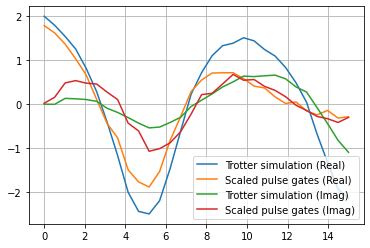

In [ ]:
time=np.linspace(0,TT,n)
plt.plot(time,a,label='Trotter simulation (Real)')
plt.plot(time,Tot_r,label='Scaled pulse gates (Real)')
plt.plot(time,b,label='Trotter simulation (Imag)')
plt.plot(time,Tot_i,label='Scaled pulse gates (Imag)')
plt.grid()
plt.legend()
plt.show()

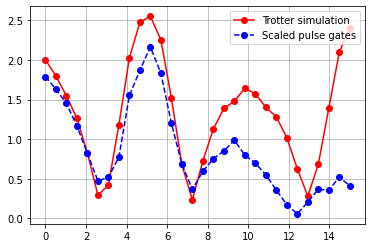

In [ ]:
time=np.linspace(0,TT,n)
plt.plot(time,np.sqrt(a**2+b**2),"go-",c='r',label='Trotter simulation')
plt.plot(time,np.sqrt(Tot_r**2+Tot_i**2),"go--",c='b',label='Scaled pulse gates')

plt.grid()
plt.legend()
plt.show()

In [ ]:
mit_job_id

{'MG_Plus1even': '61cf81c8e2b9d1f71d915094',
 'MG_minus1even': '61cf80b7255d4e0c22d67550'}